In [1]:
#importing dependacies
import pandas as pd
from DataDL import download_restful as dlr
import geopandas as gpd
import matplotlib.pyplot as plt
import mplleaflet
%matplotlib inline

### Downloading the Data

In [2]:
#downloading the puma13 data and reading it in
url = "http://www2.census.gov/acs2013_1yr/pums/csv_hny.zip" #source url
files = dlr(url, pth = "PUM_Data/PUM13/",zp=True) #calling the download function

In [3]:
#Downloading an NYC PUMA Shapefile and Documentation
url = "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nypuma_16a.zip"#From DCP
# See http://www1.nyc.gov/site/planning/data-maps/open-data.page
nyc_files = dlr(url, pth = "PUM_Data/NYC_PUMAS/",zp=True) #calling the download function

url = "http://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/nypuma_metadata.pdf"
nyc_files = dlr(url,pth = "PUM_Data/NYC_PUMAS/")

In [4]:
#Downloading the Census Tracts to PUMAs Equivilancy File
#https://www.census.gov/geo/maps-data/data/centract_rel.html
url = "http://www2.census.gov/geo/docs/maps-data/data/rel/2010_Census_Tract_to_2010_PUMA.txt"
PUM_Cens = dlr(url, pth = "PUM_Data/NYC_PUMAS/") #calling the download function

### Reading in the Data

In [5]:
#reading in puma13 files into the notebook
pums13 = pd.read_csv("../Data/PUM_Data/PUM13/ss13hny.csv", usecols = ['PUMA','WGTP', 'ACCESS', 'BROADBND', \
        'COMPOTHX', 'DIALUP', 'DSL', 'FIBEROP','MODEM', 'SATELLITE','OTHSVCEX','HANDHELD','LAPTOP'], dtype = {'PUMA':str})

In [6]:
#reading in the NYC PUMA file
puma_nyc = gpd.GeoDataFrame.from_file("../Data/PUM_Data/NYC_PUMAS/nypuma_16a/nypuma.shp")
puma_nyc['PUMA']='0'+puma_nyc['PUMA']

In [7]:
#Merging the datasets to yield only the records of NYC
p13 = pd.merge(pums13,puma_nyc, how='inner', left_on='PUMA',right_on='PUMA')


In [8]:
p13 = p13.dropna(how='all',thresh=1,subset=['ACCESS','BROADBND','DIALUP','DSL','FIBEROP','MODEM','SATELLITE','OTHSVCEX'])
p13 = p13.dropna(how='all',thresh=1,subset=['COMPOTHX','HANDHELD','LAPTOP'])
p13.head()

,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE,Shape_Area,Shape_Leng,geometry
0,04011,95,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
1,04011,175,1,2,2,1,1,2,2,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
2,04011,79,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
4,04011,187,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
5,04011,87,3,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."


In [9]:
PUMAreas=p13.groupby('PUMA')
Tot_HH = (PUMAreas.WGTP.sum()).sum()
print "Total number of Households in NYC: {0:,}".format(Tot_HH) #No of HH in NYC

Total number of Households in NYC: 3,084,862


In [10]:
print "ACS defines Broadband Access as Internet Access other than Dial-Up, through Mobile BB, DSL, Fiberop, Modem, or Satellite"
BB= p13.ix[(p13.BROADBND==1)|(p13.DSL==1)|(p13.FIBEROP==1)|(p13.MODEM==1)|(p13.SATELLITE==1)].WGTP.sum()
print "Number of NYC HH with High Speed Internet(HSI) access: {0:,} ({1:.2f}%)".format(BB,BB/float(Tot_HH)*100)
print "Number of NYC HH without HSI Access: {0:,} ({1:.2f}%)".format(Tot_HH-BB,(Tot_HH-BB)/float(Tot_HH)*100)

ACS defines Broadband Access as Internet Access other than Dial-Up, through Mobile BB, DSL, Fiberop, Modem, or Satellite
Number of NYC HH with High Speed Internet(HSI) access: 2,272,025 (73.65%)
Number of NYC HH without HSI Access: 812,837 (26.35%)


In [11]:
Comp= p13.ix[(p13.LAPTOP==1)|(p13.HANDHELD==1)].WGTP.sum()
print "Number of NYC HH with computer Access: {0:,} ({1:.2f}%)".format(Comp,Comp/float(Tot_HH)*100)
print "Number of NYC HH without computer Access: {0:,} ({1:.2f}%)".format(Tot_HH-Comp,(Tot_HH-Comp)/float(Tot_HH)*100)

Number of NYC HH with computer Access: 2,548,159 (82.60%)
Number of NYC HH without computer Access: 536,703 (17.40%)


In [12]:
onepuma=p13.ix[p13.PUMA=='04011']
print "length of PUMA 04011:{}".format(len(onepuma))
print "population of PUMA 04011:{}".format( onepuma.WGTP.sum())
onepuma.head()

length of PUMA 04011:334
population of PUMA 04011:38793


,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE,Shape_Area,Shape_Leng,geometry
0,04011,95,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
1,04011,175,1,2,2,1,1,2,2,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
2,04011,79,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
4,04011,187,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."
5,04011,87,3,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,..."


In [13]:
p13['HSI']=0
p13['Device']=0
p13.ix[(p13.BROADBND==1)|(p13.DSL==1)|(p13.FIBEROP==1)|(p13.MODEM==1)|(p13.SATELLITE==1),'HSI']\
=p13.ix[(p13.BROADBND==1)|(p13.DSL==1)|(p13.FIBEROP==1)|(p13.MODEM==1)|(p13.SATELLITE==1),'WGTP']
p13.ix[(p13.LAPTOP==1)|(p13.HANDHELD==1),'Device']=p13.ix[(p13.LAPTOP==1)|(p13.HANDHELD==1),'WGTP']
p13.head()

,PUMA,WGTP,ACCESS,BROADBND,COMPOTHX,DIALUP,DSL,FIBEROP,HANDHELD,LAPTOP,MODEM,OTHSVCEX,SATELLITE,Shape_Area,Shape_Leng,geometry,HSI,Device
0,04011,95,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,...",95,95
1,04011,175,1,2,2,1,1,2,2,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,...",175,175
2,04011,79,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,...",79,79
4,04011,187,1,2,2,2,2,2,1,1,1,2,2,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,...",187,187
5,04011,87,3,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,47632986.0327,34983.357573,"POLYGON ((1004147.387390137 180267.5375976563,...",0,0


In [14]:
HSI = PUMAreas.HSI.sum()
Device = PUMAreas.Device.sum()
Total = PUMAreas.WGTP.sum()
Final = pd.concat([HSI,Device,Total],axis=1)
Final['withoutHSI']=(Final.WGTP-Final.HSI)/Final.WGTP*100
Final['WithoutDevice']=(Final.WGTP-Final.Device)/Final.WGTP*100
Final = Final.reset_index()
Final.head()

,PUMA,HSI,Device,WGTP,withoutHSI,WithoutDevice
0,03701,31768,35535,41585,23.607070,14.548515
1,03702,33599,39321,46196,27.268595,14.882241
2,03703,33958,36252,44637,23.924099,18.784865
3,03704,29102,33676,42571,31.638909,20.894506
4,03705,33164,41499,55848,40.617390,25.692952


### Joining the Data to the Census Tract Data

In [15]:
# Reading in THe census Tract Lookup Table
lookup = pd.read_csv('../Data/PUM_Data/NYC_PUMAS/2010_Census_Tract_to_2010_PUMA.txt',dtype=str, )
lookup.head()

,STATEFP,COUNTYFP,TRACTCE,PUMA5CE
0,01,001,020100,02100
1,01,001,020200,02100
2,01,001,020300,02100
3,01,001,020400,02100
4,01,001,020500,02100


In [16]:
lookup = lookup[lookup['STATEFP']=='36'] # Selecting only Census Tracts of New York
lookup['censustract']=lookup['STATEFP']+lookup['COUNTYFP']+lookup['TRACTCE'] #Creating CT Code
pumcensus = pd.merge(lookup,Final, how='inner', left_on='PUMA5CE',right_on='PUMA')#Merging onto PUMAs
pumcensus = pumcensus.drop(labels = ['STATEFP','COUNTYFP','TRACTCE','PUMA5CE'],axis=1)

In [17]:
pumcensus.head()

,censustract,PUMA,HSI,Device,WGTP,withoutHSI,WithoutDevice
0,36005026701,03701,31768,35535,41585,23.60707,14.548515
1,36005026702,03701,31768,35535,41585,23.60707,14.548515
2,36005027300,03701,31768,35535,41585,23.60707,14.548515
3,36005027700,03701,31768,35535,41585,23.60707,14.548515
4,36005027900,03701,31768,35535,41585,23.60707,14.548515


In [18]:
pumcensus.to_csv("../Deliverables/PUMAcensus.csv")

### Mapping

In [19]:
#Setting indexes to PUMA, so that we can join them (in order to retain the Datatype as gpd)
net_info = pumcensus.set_index('PUMA')
pumanyc = puma_nyc.set_index('PUMA')

In [20]:
MapPUMA = pumanyc.join(net_info, how="inner",rsuffix='net')

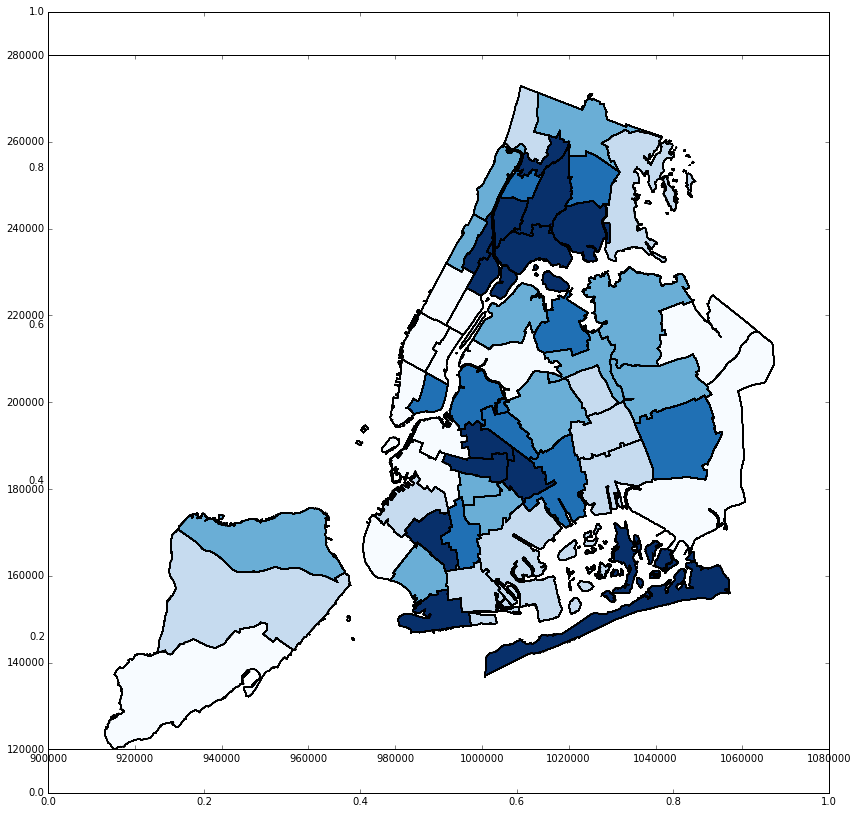

In [21]:
f, ax = plt.subplots(1, figsize=(14,14))
MapPUMA.plot(column='withoutHSI', scheme='QUANTILES', alpha=1, colormap='Blues')

In [22]:
mplleaflet.display(fig = f)